In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 1. Fuzzy C Means algorithm

In [3]:
import numpy as np
import random
import math

class FCM:
    def __init__(self,X,C,m,t_max ,epsilon):
        self.C = C
        self.m = m
        self.alpha = -2 / (self.m - 1)
        self.t_max = t_max
        self.epsilon = epsilon
        min_= []*self.C
        max_ = []*self.C
        dists = [ int(len(X) / self.C) * j  for j in range(self.C+1)]
        dists
        for i in range(self.C):           
            min_.append([min(X[dists[i]: dists[i+1]-1,j])  for j in range(len(X[0]))])
            max_.append([max(X[dists[i]: dists[i+1]-1,j])  for j in range(len(X[0]))]) 
        self.V = [[ random.uniform( min_[i][j],max_[i][j]) for j in range(len(X[0]))] for i in range(self.C)]
        self.U = [ [0] *  len(X) for i in range(self.C)] 
        self.V_initiale = [ self.V[j].copy() for j in range(self.C)] 
    
    def calculer_U(self,X):
        for i in range(self.C):
            term1 = 0
            for j in range(len(X)):
                term1 = pow(math.dist(X[j] , self.V[i]),self.alpha)
                term2 = 0
                for k in range(self.C):
                    term2 += pow(math.dist(X[j] , self.V[k]),self.alpha)
                self.U[i][j] = term1/term2 # Uij
    
    def calculer_V(self,X):
        for i in range(self.C):
            for p in range(len(X[0])):  
                term2 = 0
                term1 = 0
                for j in range(len(X)):
                    term2 += pow(self.U[i][j],self.m)                    
                    term1 += pow(self.U[i][j],self.m) * X[j][p]
                self.V[i][p] = term1/term2
                
    def affichage(self,X):
        #print(self.V)
        self.calculer_U(X)
        #print(self.U)
        som = 0 
        for i in range(self.C):
            for j in range(len(X)):
                som += self.U[i][j]
        print(som)
        
        
    def  calculer_epsilon(self,X,V):
        Vt =  V
        Vt1 = [ self.V[j].copy() for j in range(self.C)]   
        res = 0   
        for i in range(len(self.V)):
            res += math.dist(Vt[i],Vt1[i])
            
        return res
    
    def etiquterV(self,Vi,V):
        y = []
        for i in range(len(V)):
            l = [math.dist(Vi[i],V[0]), math.dist(Vi[i],V[1]),math.dist(Vi[i],V[2])]
            y.append(l.index(min(l)))
        return y

    def FCM_classification(self,eti):
        y = []
        for i in range(len(self.U[0])):
            l = [ self.U[eti[0]][i] , self.U[eti[1]][i],self.U[eti[2]][i]]
            y.append(l.index(max(l)))
        return y   
    
    def TR(self,X,Y,eti):
        y_ = self.FCM_classification(eti)
        r = 0
        for i in range(len(X)):
            if Y[i] == y_[i]:
                r += 1
        return r/len(X)
        
        
    def PC(self,X):
        res = 0
        for i in range(len(X)):
            for j in range(self.C):
                res += pow(self.U[j][i],2)
            res /= len(X)
            
        return res
            
            
    def entropie(self,X):
        res = 0
        for i in range(len(X)):
            for j in range(self.C):
                res += self.U[j][i] * math.log2(self.U[j][i])
            res /= len(X)
        return res
    
    def train(self,X,Y):
        t = 0
        res = []
        while t < self.t_max :
            self.calculer_U(X)
            # V = [ self.V[j].copy() for j in range(self.C)] 
            self.calculer_V(X)
            #  self.calculer_epsilon(X,V)
            t += 1
            eti = self.etiquterV(self.V_initiale,self.V)
            res.append([self.entropie(X),self.PC(X),self.TR(X,Y,eti)])
        return res
        

In [4]:
algo = FCM(X,3,2,10,0.001)
res = algo.train(X,Y)

print(res)

[[-0.005547843738082685, 0.004440593341122125, 0.66], [-0.006740805412747254, 0.003611774994784925, 0.6666666666666666], [-0.0074336366824916235, 0.003270434684002876, 0.6666666666666666], [-0.00763808025321515, 0.003209750203905198, 0.6666666666666666], [-0.007663649273965144, 0.0032192569054518647, 0.6666666666666666], [-0.007640033415486595, 0.003242218588885698, 0.6666666666666666], [-0.00761089988586187, 0.0032630572018129537, 0.6666666666666666], [-0.007587196179515624, 0.003278767205440356, 0.6666666666666666], [-0.007570090386309759, 0.0032897948412669896, 0.6666666666666666], [-0.007558357585523652, 0.003297271357952442, 0.6666666666666666]]


In [5]:
algo.etiquterV(algo.V,algo.V_initiale)

[0, 1, 2]

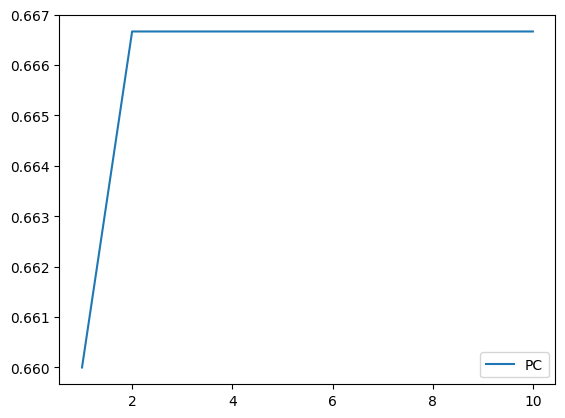

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = list(range(1,11))

y3 = [ res[j][2] for j in range(10) ]

fig, ax = plt.subplots()
ax.plot(x, y3, label="PC")


ax.legend()

plt.show()

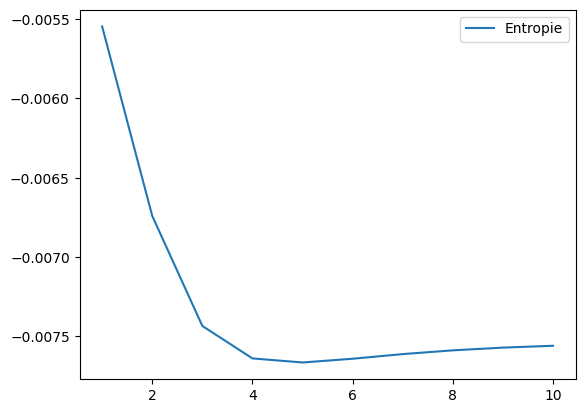

In [7]:
x = list(range(1,11))
y1 = [ res[j][0] for j in range(10) ]

fig, ax = plt.subplots()
ax.plot(x, y1, label="Entropie")


ax.legend()

plt.show()

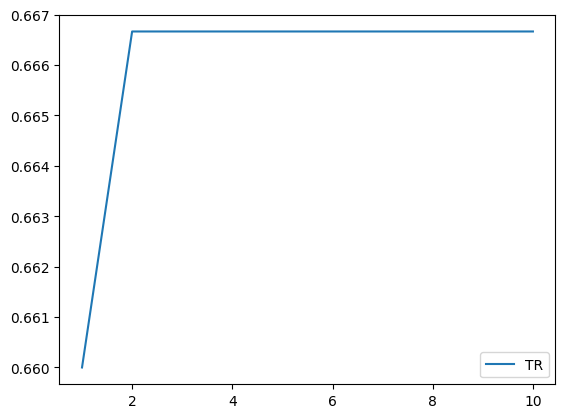

In [8]:
x = list(range(1,11))

y3 = [ res[j][2] for j in range(10) ]

fig, ax = plt.subplots()

ax.plot(x, y3, label="TR")

ax.legend()

plt.show()

### 2. Plotting the results

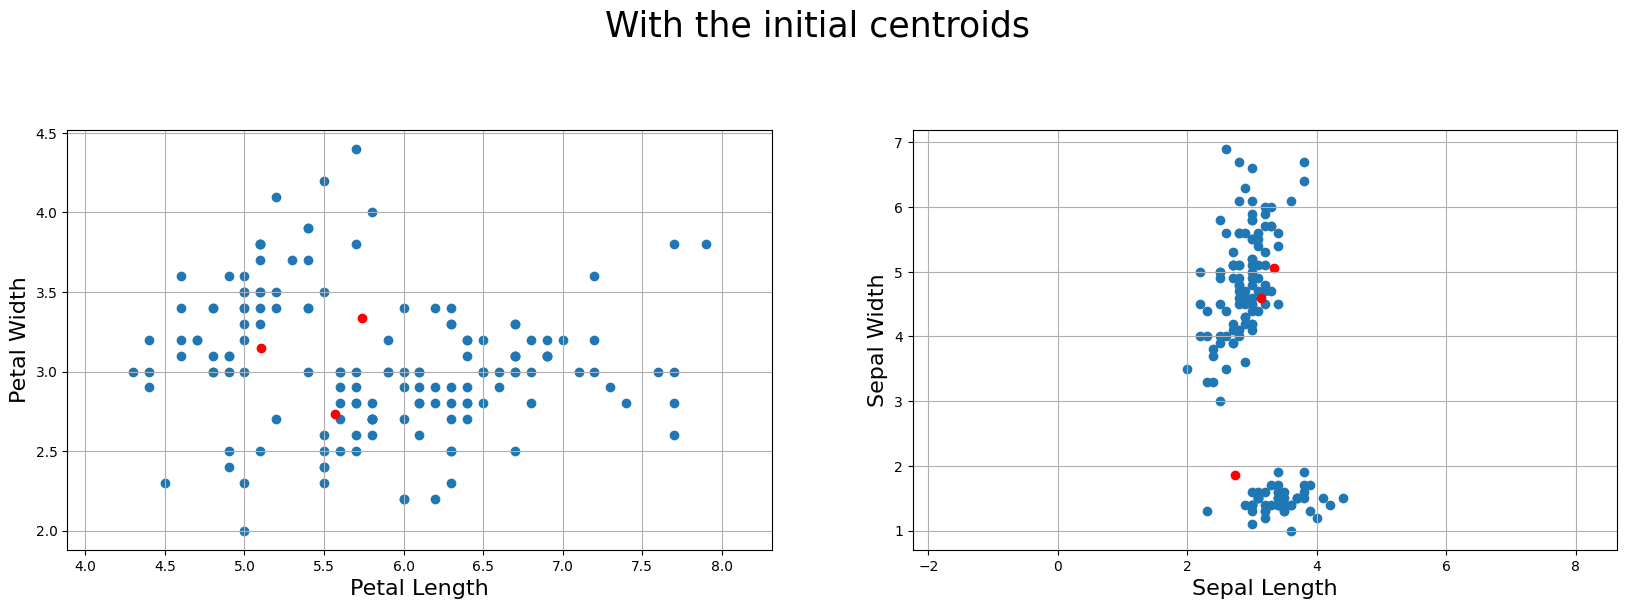

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
def plotData(X,Y,C,i,z,titre):  
    plt.subplot(2,2,z+1)                                            
    plt.scatter(X,Y, marker='o')    
    for center in C:
        plt.scatter(center[i],center[i+1], marker='o',color='r')        
    plt.axis('equal')                                                                 
    plt.xlabel(titre+' Length', fontsize=16)                                                 
    plt.ylabel(titre+' Width', fontsize=16)                                                                                      
    plt.grid() 
    
    
plt.suptitle("With the initial centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],algo.V_initiale,i,i,titre[i])
    
    



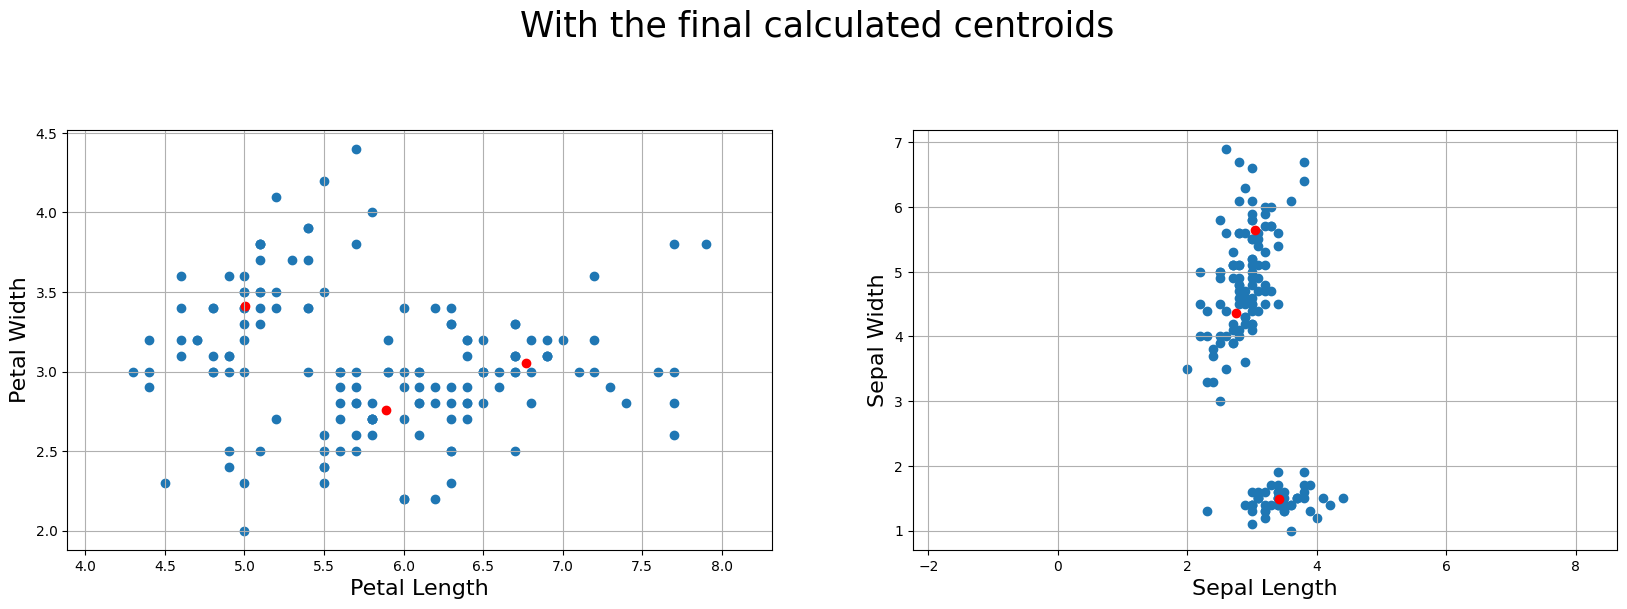

In [10]:
plt.figure(figsize=(20, 12))
plt.suptitle("With the final calculated centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],algo.V,i,i,titre[i])